# 02_DATA PREPROCESSING AND VISUALIZATION 
**Mục tiêu:**
1. **Data Preprocessing:** Làm sạch toàn bộ dữ liệu thô (`Missing value`,`Feature Engineering`,`Tranform`,`Encoding`,`Label`) , lưu cleaned_data vào thư mục processed_data
2. **Visualization:** Trực quan hóa dựa vào các câu hỏi ý nghĩa
3. **Insights and Conclusion:** Rút ra được góc nhìn hay và kết luận 

## 1.Tải dữ liệu thô (raw_data) và định dạng các cột
**Mục tiêu:** Tải dữ liệu thô và loại bỏ các cột không cần thiết , định dạng các kiểu dữ liệu đúng cho từng cột 

### Import các thư viện cần thiết và src

In [1]:
import sys 
import os
import matplotlib.pyplot as plt
sys.path.append(os.path.abspath(os.path.join('..', 'src')))
import numpy as np 
import seaborn as sns
import data_processing as dp
import visualization as vi
import warnings
sns.set_theme(style="whitegrid", palette="pastel")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

### Tải dữ liệu thô và đinh dạng

In [2]:
file_path = '../data/raw/BankChurners.csv'
data, header = dp.load_data(file_path)
col_to_index = {col_name: i for i ,col_name in enumerate(header)} #Trích xuất chỉ số các header
#Lấy tên các cột không cần thiêt
cols_to_drop = ["CLIENTNUM",
                "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1",
               "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"]

#Láy tên các cột số
numerical_cols = ['Customer_Age', 'Dependent_count', 'Months_on_book', 
    'Total_Relationship_Count', 'Months_Inactive_12_mon', 
    'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 
    'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Amt_Chng_Q4_Q1',
    'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']
#Lấy tên các cột categorical
categorical_cols = ['Attrition_Flag', 'Gender', 'Education_Level', 
    'Marital_Status', 'Income_Category', 'Card_Category']
#Tạo một dictionary để lưu trữ các dữ liệu theo đúng kiểu dữ liệu của nó , và đã loại bỏ các cột không cần thiết
clean_data_store = {}
for col_name in header:
    if col_name in cols_to_drop:
        continue
    col_str = data[:,col_to_index[col_name]] #Trích xuất data của cột đó
    if col_name in numerical_cols:
        col_float, null_mask = dp.get_valid_numerical_array(col_str)
        col_float[null_mask] = np.nan
        clean_data_store[col_name] = col_float 
    elif col_name in categorical_cols:
        clean_data_store[col_name] = col_str

for key , values in clean_data_store.items():
    print(key,values)

Attrition_Flag ['Existing Customer' 'Existing Customer' 'Existing Customer' ...
 'Attrited Customer' 'Attrited Customer' 'Attrited Customer']
Customer_Age [45. 49. 51. ... 44. 30. 43.]
Gender ['M' 'F' 'M' ... 'F' 'M' 'F']
Dependent_count [3. 5. 3. ... 1. 2. 2.]
Education_Level ['High School' 'Graduate' 'Graduate' ... 'High School' 'Graduate'
 'Graduate']
Marital_Status ['Married' 'Single' 'Married' ... 'Married' 'Unknown' 'Married']
Income_Category ['$60K - $80K' 'Less than $40K' '$80K - $120K' ... 'Less than $40K'
 '$40K - $60K' 'Less than $40K']
Card_Category ['Blue' 'Blue' 'Blue' ... 'Blue' 'Blue' 'Silver']
Months_on_book [39. 44. 36. ... 36. 36. 25.]
Total_Relationship_Count [5. 6. 4. ... 5. 4. 6.]
Months_Inactive_12_mon [1. 1. 1. ... 3. 3. 2.]
Contacts_Count_12_mon [3. 2. 0. ... 4. 3. 4.]
Credit_Limit [12691.  8256.  3418. ...  5409.  5281. 10388.]
Total_Revolving_Bal [ 777.  864.    0. ...    0.    0. 1961.]
Total_Amt_Chng_Q4_Q1 [1.335 1.541 2.594 ... 0.819 0.535 0.703]
Total_Tra

## 2. Xử lý missing value và điền giá trị thiếu 

Ở file `01_data_exploration` ta thấy:
- Các cột chứa **missing value** có 3 cột `Education_Level`, `Marital_Status`, `Income Category` là các cột **categorical data**
- Lần lượt phần trăm giá trị thiếu là: `15% null`, `7.4% null`, `10.98% null` trong tổng 10127 dòng

**Insights:** Cần phải xem xét lại cột `Income_Category`
- 2 cột `Education_Level`, `Marital_Status` có thể là missing value thật
- `Income_Category` có nhiều **missing value**  không phải là lỗi mà là phản ánh việc khách hàng **Không muốn hoặc không thể cung cấp thu nhập**, nếu điền giá trị vào nó sẽ gây nhiều mô hình vì dữ liệu sai.

**Kết luận:** 
- Chúng ta có thể điền giá trị thiếu cho hai cột `Education_Level`, `Marital_Status` bằng `fill_categorical_value_with_mode` được đinh nghĩa trước đó.
- `Income_Category` cần trực quan hóa để có cái nhìn tổng quan hơn về vấn đề .

### Trực quan hóa cột Income_Category

#### Boxplot so sánh mức chi tiêu theo Income_Category

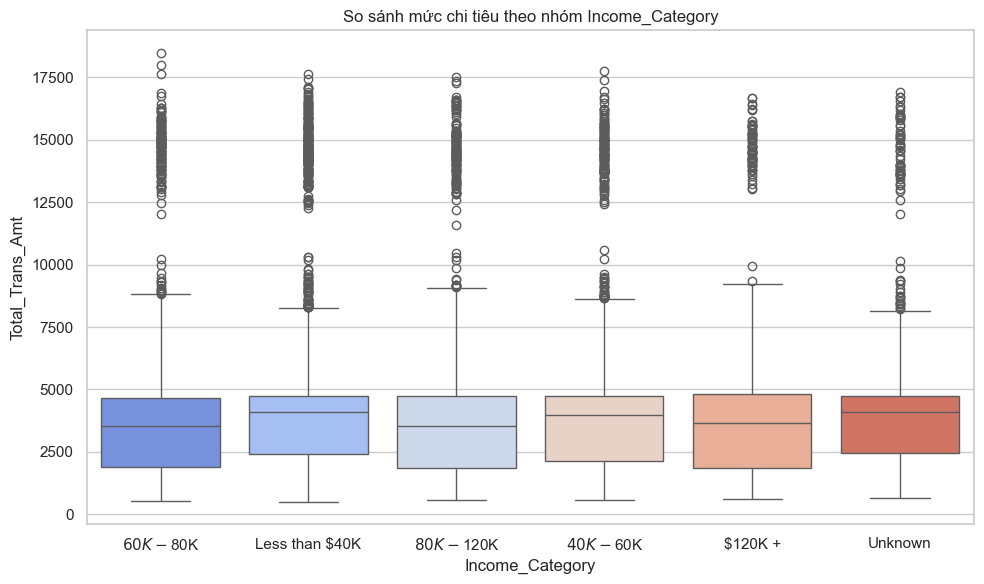

In [3]:
plt.figure(figsize=(10,6))
sns.boxplot(data=clean_data_store, x='Income_Category', y='Total_Trans_Amt',palette = 'coolwarm')
plt.title('So sánh mức chi tiêu theo nhóm Income_Category')
plt.xticks()
plt.tight_layout()
plt.show()

**Nhận xét:**
- Biểu đồ boxplot cho thấy nhóm **“Unknown”** có phân phối chi tiêu `Total_Trans_Amt`
không trùng khớp hoàn toàn với bất kỳ nhóm thu nhập nào khác.

- Dù median của nhóm này không nằm ngoài phạm vi chung, nhưng **độ rộng hộp (IQR)**, mức độ phân tán và vị trí tương đối của median cho thấy đây vẫn là một nhóm hành vi riêng biệt.

Điều này chứng minh rằng **“Unknown”** không phải là dữ liệu bị **thiếu (missing)**,
mà là một trạng thái hành vi **đáng tin cậy** trong dataset.

#### Bar chart thể hiện tỷ lệ churn theo Income_Category

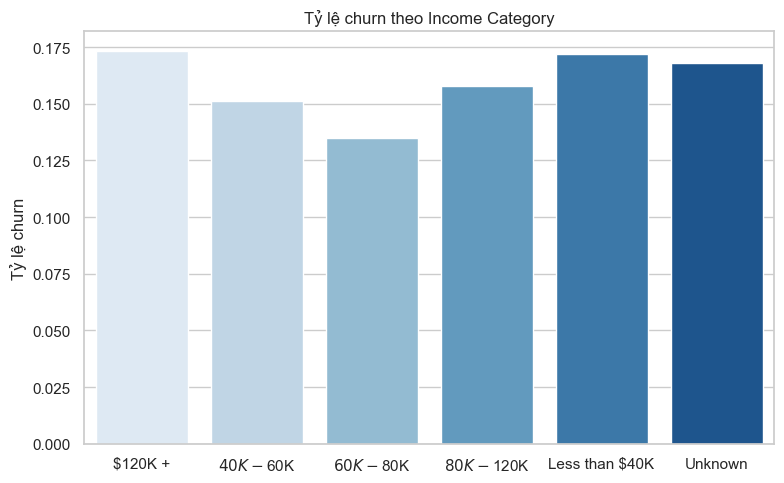

In [4]:
attr = clean_data_store["Attrition_Flag"]
is_churn = (attr == "Attrited Customer").astype(int)
income = clean_data_store["Income_Category"]
income_vals = np.unique(income)
churn_rates = []
for inc in income_vals:
    mask = income == inc
    churn_rate = is_churn[mask].mean()   # mean của 0/1 chính là tỷ lệ
    churn_rates.append(churn_rate)

plt.figure(figsize=(8,5))
sns.barplot(x=income_vals, y=churn_rates, palette='Blues')
plt.title("Tỷ lệ churn theo Income Category")
plt.ylabel("Tỷ lệ churn")
plt.xticks()
plt.tight_layout()
plt.show()

**Biểu đồ barplot cho thấy nhóm “Unknown” có tỷ lệ churn nằm trong nhóm cao nhất**

`(~17%)`, tương đương với nhóm thu nhập thấp nhất **(“Less than $40K”).**

Điều này gợi ý rằng việc khách hàng không khai báo thu nhập 
có thể liên quan đến mức độ rủi ro hoặc sự thiếu gắn kết với tổ chức phát hành thẻ.

Nếu ta thay **“Unknown”** bằng median hoặc loại bỏ nó, mô hình sẽ mất đi tín hiệu churn quan trọng này.

**Insights:**
- Hai biểu đồ EDA cho thấy giá trị `“Unknown”` trong `Income_Category` không phải là **missing data** theo nghĩa thống kê. Nhóm này thể hiện hành vi chi tiêu riêng và đặc biệt có tỷ lệ churn nằm trong nhóm cao nhất.
- Do đó, chúng ta giữ nguyên “Unknown” như một category hợp lệ thay vì điền giá trị hoặc loại bỏ nó. 
**Quyết định này giúp mô hình học đúng hơn về đặc điểm rủi ro của khách hàng.**

### Xử lý missingg value

In [5]:
#Tạo một dictionary processed_data 
processed_data = {}
y_final = None # lưu biến muc tiêu
# 1. Xử lý Missing Cột SỐ (điền mean)
for col_name in numerical_cols:
    col = clean_data_store[col_name].copy()
    mean_val = np.nanmean(col)
    col[np.isnan(col)] = mean_val
    processed_data[col_name] = col

print(f"Đã điền 'nan' (nếu có) cho các cột số.")

# 2. Xử lý Missing cột Phân loại (điền mode)
for col_name in categorical_cols:
    col_str = clean_data_store[col_name]
    if col_name == 'Attrition_Flag':
        processed_data[col_name] = col_str
        continue
    elif col_name == 'Income_Category':
        #Giữ nguyên các giá trị 'Unknown'
        processed_data[col_name] = col_str
        print("Giữ nguyên Unknown cho cột Income_Category")
        continue 
    else:
        #Điền mode
        col_filled_with_mode = dp.fill_categorical_value_with_mode(col_str)
        processed_data[col_name] = col_filled_with_mode
print("Đã điền mode cho các cột Education_Level và Marital_Status")

Đã điền 'nan' (nếu có) cho các cột số.
Đã thay thế bằng giá trị mode:F
Đã thay thế bằng giá trị mode:Graduate
Đã thay thế bằng giá trị mode:Married
Giữ nguyên Unknown cho cột Income_Category
Đã thay thế bằng giá trị mode:Blue
Đã điền mode cho các cột Education_Level và Marital_Status


In [6]:
for col, arr in processed_data.items():
    print(f"{col}: {arr[:10]}")
print('='*80)
col = processed_data["Education_Level"]
unique, counts = np.unique(col, return_counts=True)
print(dict(zip(unique, counts)))
print('='*80)

Customer_Age: [45. 49. 51. 40. 40. 44. 51. 32. 37. 48.]
Dependent_count: [3. 5. 3. 4. 3. 2. 4. 0. 3. 2.]
Months_on_book: [39. 44. 36. 34. 21. 36. 46. 27. 36. 36.]
Total_Relationship_Count: [5. 6. 4. 3. 5. 3. 6. 2. 5. 6.]
Months_Inactive_12_mon: [1. 1. 1. 4. 1. 1. 1. 2. 2. 3.]
Contacts_Count_12_mon: [3. 2. 0. 1. 0. 2. 3. 2. 0. 3.]
Credit_Limit: [12691.  8256.  3418.  3313.  4716.  4010. 34516. 29081. 22352. 11656.]
Total_Revolving_Bal: [ 777.  864.    0. 2517.    0. 1247. 2264. 1396. 2517. 1677.]
Total_Trans_Amt: [1144. 1291. 1887. 1171.  816. 1088. 1330. 1538. 1350. 1441.]
Total_Trans_Ct: [42. 33. 20. 20. 28. 24. 31. 36. 24. 32.]
Total_Amt_Chng_Q4_Q1: [1.335 1.541 2.594 1.405 2.175 1.376 1.975 2.204 3.355 1.524]
Total_Ct_Chng_Q4_Q1: [1.625 3.714 2.333 2.333 2.5   0.846 0.722 0.714 1.182 0.882]
Avg_Utilization_Ratio: [0.061 0.105 0.    0.76  0.    0.311 0.066 0.048 0.113 0.144]
Attrition_Flag: ['Existing Customer' 'Existing Customer' 'Existing Customer'
 'Existing Customer' 'Existing Cu

## 3. Feature Engineering cơ bản , tạo thuộc tính mới và giảm chiều dữ liệu 
Dựa trên ma trận tương quan, ta phát hiện một số cặp biến có tương quan cao 
**(đa cộng tuyến)**. Để giảm nhiễu, tránh **redundancy** và **tăng diễn giải mô hình**, thực hiện Feature Engineering như sau:

1. Tạo `Avg_Trans_Amount = Total_Trans_Amt / Total_Trans_Ct` 
   → Bỏ hai cột gốc do tương quan cao **(r = 0.81)**.

2. Tạo `Has_Revolving_Bal` (0/1) từ `Total_Revolving_Bal`
   → Giữ thông tin quan trọng nhưng giảm đa cộng tuyến với Avg_Utilization_Ratio.

3. Bỏ `Customer_Age` vì tương quan cao với `Months_on_book` **(r = 0.79)**.

4. Bỏ `Avg_Utilization_Ratio` vì trùng thông tin với `Revolving_Bal` và `Credit_Limit`.

Quyết định này giúp mô hình gọn hơn, dễ giải thích, và tránh đa cộng tuyến.


In [7]:
# Lấy các cột
total_amt = processed_data['Total_Trans_Amt']
total_ct = processed_data['Total_Trans_Ct']
revolving_bal = processed_data['Total_Revolving_Bal']

# Tạo đặc trưng mới
processed_data['Avg_Trans_Amount'] = total_amt / total_ct
processed_data['Has_Revolving_Bal'] = (revolving_bal > 0).astype(int)
print("Đã tạo: 'Avg_Trans_Amount', 'Has_Revolving_Bal'")

# Loại bỏ các cột cũ
cols_to_engineer_out = [
    'Total_Trans_Amt', 'Total_Revolving_Bal',
    'Customer_Age', 'Avg_Utilization_Ratio'
]

for col_name in cols_to_engineer_out:
    del processed_data[col_name]
print(f"Đã loại bỏ {len(cols_to_engineer_out)} cột gốc.")
#Label encoding cho cột Attrition_Flag
y_final = dp.label_encoding(processed_data['Attrition_Flag'], 'Attrited Customer')
del processed_data['Attrition_Flag']

Đã tạo: 'Avg_Trans_Amount', 'Has_Revolving_Bal'
Đã loại bỏ 4 cột gốc.


In [8]:
for col, arr in processed_data.items():
    print(f"{col}: {arr[:10]}")

Dependent_count: [3. 5. 3. 4. 3. 2. 4. 0. 3. 2.]
Months_on_book: [39. 44. 36. 34. 21. 36. 46. 27. 36. 36.]
Total_Relationship_Count: [5. 6. 4. 3. 5. 3. 6. 2. 5. 6.]
Months_Inactive_12_mon: [1. 1. 1. 4. 1. 1. 1. 2. 2. 3.]
Contacts_Count_12_mon: [3. 2. 0. 1. 0. 2. 3. 2. 0. 3.]
Credit_Limit: [12691.  8256.  3418.  3313.  4716.  4010. 34516. 29081. 22352. 11656.]
Total_Trans_Ct: [42. 33. 20. 20. 28. 24. 31. 36. 24. 32.]
Total_Amt_Chng_Q4_Q1: [1.335 1.541 2.594 1.405 2.175 1.376 1.975 2.204 3.355 1.524]
Total_Ct_Chng_Q4_Q1: [1.625 3.714 2.333 2.333 2.5   0.846 0.722 0.714 1.182 0.882]
Gender: ['M' 'F' 'M' 'F' 'M' 'M' 'M' 'M' 'M' 'M']
Education_Level: ['High School' 'Graduate' 'Graduate' 'High School' 'Uneducated' 'Graduate'
 'Graduate' 'High School' 'Uneducated' 'Graduate']
Marital_Status: ['Married' 'Single' 'Married' 'Married' 'Married' 'Married' 'Married'
 'Married' 'Single' 'Single']
Income_Category: ['$60K - $80K' 'Less than $40K' '$80K - $120K' 'Less than $40K'
 '$60K - $80K' '$40K - 

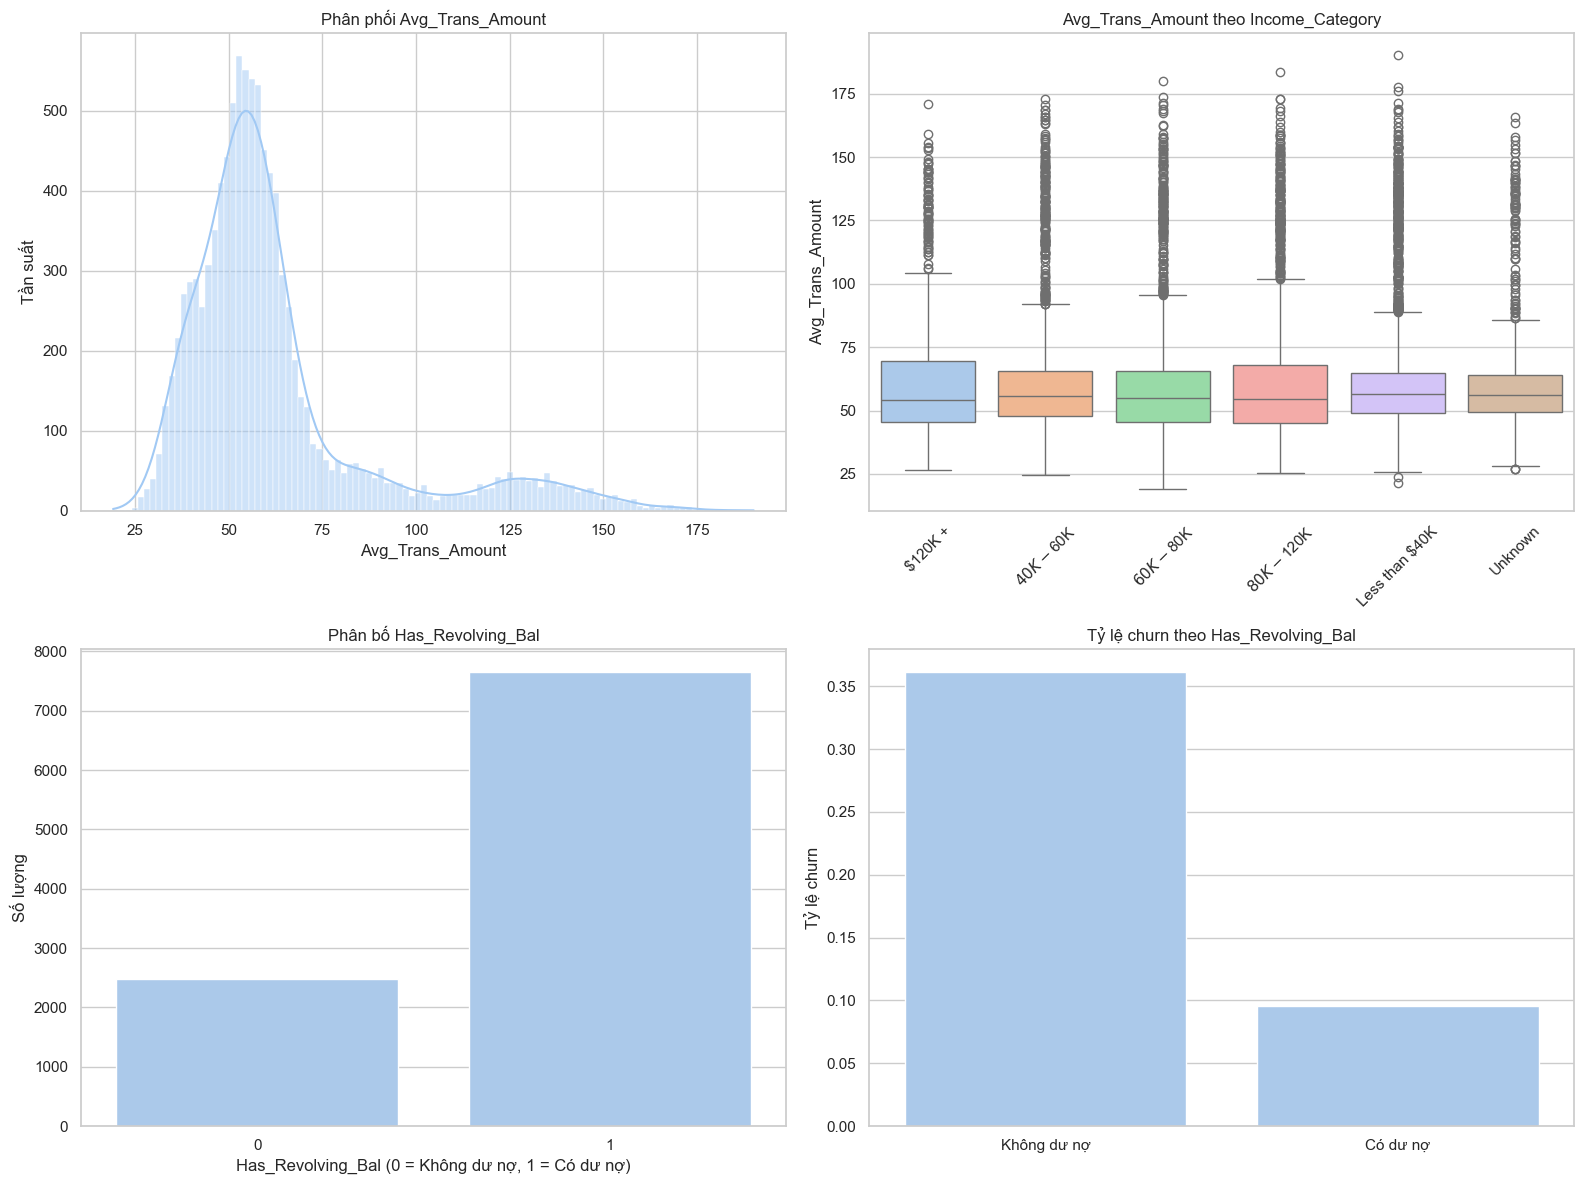

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Lấy dữ liệu
avg_trans = processed_data['Avg_Trans_Amount']
income = processed_data['Income_Category']
has_rev = processed_data['Has_Revolving_Bal']
churn = y_final

income_vals = np.unique(income)
avg_trans_groups = [avg_trans[income == inc] for inc in income_vals]

# Tính tỷ lệ churn theo Has_Revolving_Bal
rate_0 = churn[has_rev == 0].mean()
rate_1 = churn[has_rev == 1].mean()

# ---------- SUBPLOT ----------
plt.figure(figsize=(16,12))

# 1. Histogram Avg_Trans_Amount
plt.subplot(2,2,1)
sns.histplot(avg_trans, kde=True)
plt.title("Phân phối Avg_Trans_Amount")
plt.xlabel("Avg_Trans_Amount")
plt.ylabel("Tần suất")

# 2. Boxplot Avg_Trans_Amount theo Income_Category
plt.subplot(2,2,2)
sns.boxplot(data=avg_trans_groups)
plt.xticks(range(len(income_vals)), income_vals, rotation=45)
plt.title("Avg_Trans_Amount theo Income_Category")
plt.ylabel("Avg_Trans_Amount")

# 3. Countplot Has_Revolving_Bal
plt.subplot(2,2,3)
sns.countplot(x=has_rev)
plt.title("Phân bố Has_Revolving_Bal")
plt.xlabel("Has_Revolving_Bal (0 = Không dư nợ, 1 = Có dư nợ)")
plt.ylabel("Số lượng")

# 4. Barplot churn theo Has_Revolving_Bal
plt.subplot(2,2,4)
sns.barplot(
    x=['Không dư nợ', 'Có dư nợ'], 
    y=[rate_0, rate_1]
)
plt.title("Tỷ lệ churn theo Has_Revolving_Bal")
plt.ylabel("Tỷ lệ churn")

plt.tight_layout()
plt.show()


**Insights:**
1. **Dư nợ xoay vòng (Revolving Balance) là một chỉ báo Churn cực kỳ mạnh mẽ**
   - Phát hiện (từ "**Tỷ lệ churn theo Has_Revolving_Bal**"): Nhóm khách hàng **"Không dư nợ"** có tỷ lệ `churn (rời bỏ)` cao đột biến, lên tới khoảng `36%`. Ngược lại, nhóm **"Có dư nợ"** có tỷ lệ `churn` rất thấp, chỉ khoảng `9%`.
   - Bối cảnh (từ **"Phân bố Has_Revolving_Bal"**): Mặc dù nhóm **"Không dư nợ"** (khoảng `2.500` người) nhỏ hơn đáng kể so với nhóm **"Có dư nợ"** (khoảng `7.600` người), họ lại là nhóm **rủi ro chính.**
   - Nhóm **"Không dư nợ"** rất có thể chứa một tỷ lệ lớn các khách hàng `không hoạt động`, những người không dùng thẻ và do đó có nguy cơ rời bỏ cao nhất.
2. **Thu nhập không ảnh hưởng rõ rệt đến giá trị mỗi giao dịch**
   - Phát hiện (từ **"Avg_Trans_Amount theo Income_Category"**): Đây là một insight khá bất ngờ.
   - Nhìn vào các biểu đồ hộp **(boxplot)**, giá trị trung vị **(median)**—đường kẻ ngang giữa hộp—của `Avg_Trans_Amount` là gần như tương đồng ở tất cả các nhóm thu nhập, kể cả nhóm `"$120K+"` và `"Less than $40K"`. Tất cả đều xoay quanh mốc khoảng `$60`.
   - **Kết luận**: **Thu nhập cao hơn** không đồng nghĩa với việc **giá trị mỗi lần quẹt thẻ** của khách hàng đó cao hơn. Điều này cho thấy `Income_Category` có thể không phải là một biến dự báo tốt cho `Avg_Trans_Amount`. Hành vi chi tiêu có vẻ là một yếu tố độc lập hơn so với thu nhập.

## 4.Chẩn đoán (Skewness) và Biến đổi (Log Transform)
Các biến số sau khi tiền xử lý và Feature Engineering thường không tuân theo 
phân phối chuẩn (Gaussian). Điều này ảnh hưởng đến:

- Hiệu quả học của các mô hình tuyến tính (Logistic Regression)
- Khả năng hội tụ của Gradient Descent
- Độ nhạy với outliers
- Tính ổn định của các Feature có phân phối quá lệch (skewed)

Vì vậy, ở bước này, chúng ta tiến hành:

1. **Chẩn đoán độ lệch (Skewness)** từng biến số  
2. **Đánh dấu các biến bị lệch mạnh (|skew| > 1.5)**  
3. **Áp dụng Log Transform ngay lập tức** để đưa phân phối tiệm cận chuẩn  
4. **Vẽ lại phân phối sau khi biến đổi** để kiểm tra hiệu quả

Kết quả được lưu vào `data_for_analysis`, là bản dữ liệu cuối cùng phục vụ việc
chuẩn hóa và xây dựng mô hình.


--- BÁO CÁO CHẨN ĐOÁN (TRƯỚC LOG) ---
  - Dependent_count: GẦN CHUẨN (Skew=-0.02) -> Giữ nguyên
  - Months_on_book: GẦN CHUẨN (Skew=-0.11) -> Giữ nguyên
  - Total_Relationship_Count: GẦN CHUẨN (Skew=-0.16) -> Giữ nguyên
  - Months_Inactive_12_mon: GẦN CHUẨN (Skew=0.63) -> Giữ nguyên
  - Contacts_Count_12_mon: GẦN CHUẨN (Skew=0.01) -> Giữ nguyên
  - Credit_Limit: LỆCH NẶNG (Skew=1.67) -> Sẽ Log Transform. Skew mới = 0.46
  - Total_Trans_Ct: GẦN CHUẨN (Skew=0.15) -> Giữ nguyên
  - Total_Amt_Chng_Q4_Q1: LỆCH NẶNG (Skew=1.73) -> Sẽ Log Transform. Skew mới = 0.65
  - Total_Ct_Chng_Q4_Q1: LỆCH NẶNG (Skew=2.06) -> Sẽ Log Transform. Skew mới = 0.51
  - Avg_Trans_Amount: LỆCH NẶNG (Skew=1.88) -> Sẽ Log Transform. Skew mới = 0.93


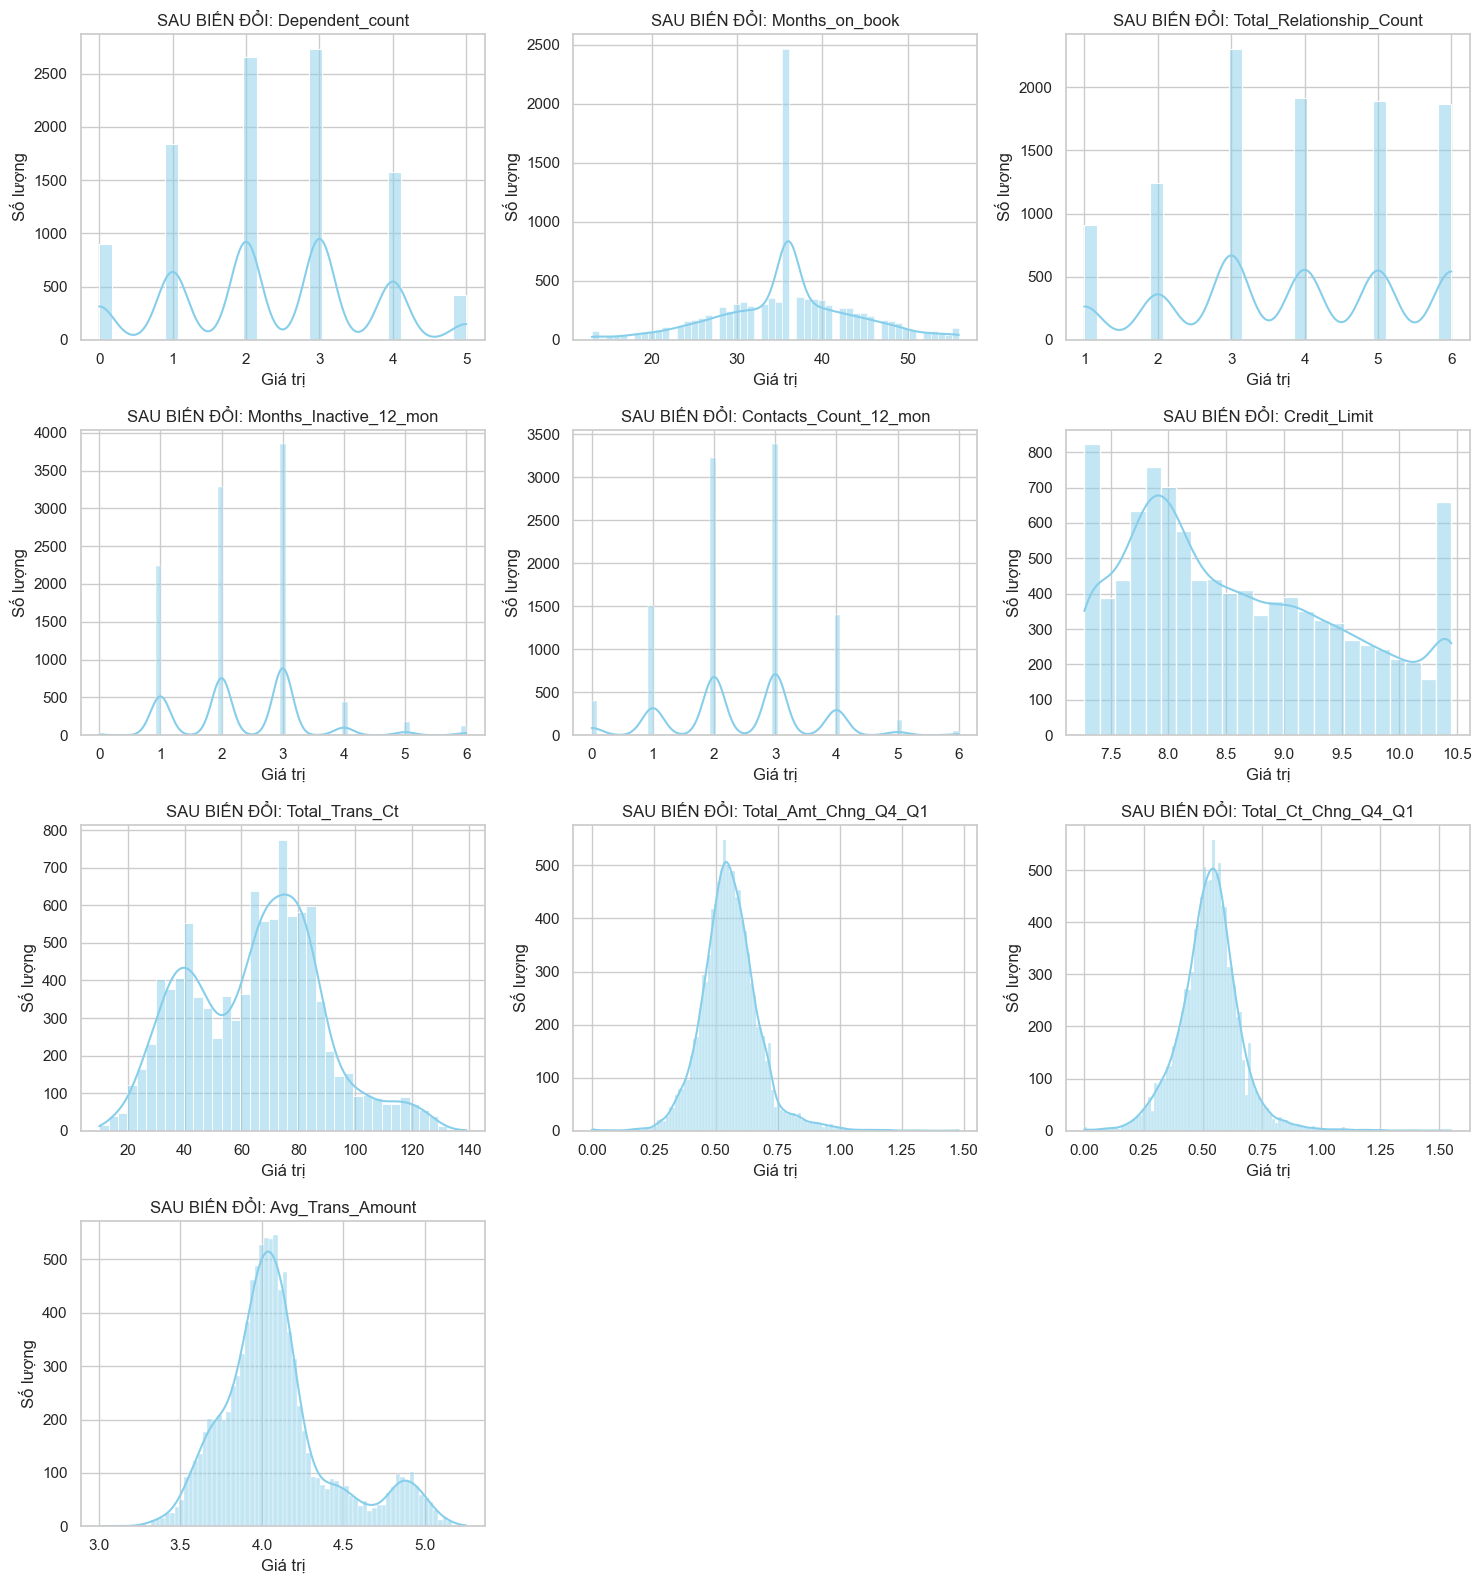

In [10]:
#Lấy các cột số 
numerical_cols = [
    name for name in processed_data.keys() 
    if processed_data[name].dtype == 'float64'
]
#Nơi lưu các cột đã biên đổi 
data_for_analysis = processed_data.copy()
# Chẩn đoán (Lặp, tính Skew, vẽ)
num_cols = len(numerical_cols)
grid_cols = 3
grid_rows = int(np.ceil(num_cols / grid_cols))
fig, axes = plt.subplots(grid_rows, grid_cols, figsize=(grid_cols * 5, grid_rows * 4))
axes = axes.flatten()
print("\n--- BÁO CÁO CHẨN ĐOÁN (TRƯỚC LOG) ---")
cols_to_log_transform = []

for i, col_name in enumerate(numerical_cols):
    col = data_for_analysis[col_name]
    skew = dp.calculate_skewness(col)
    
    if skew > 1.5 or skew < -1.5:
        decision = f"LỆCH NẶNG (Skew={skew:.2f}) -> Sẽ Log Transform"
        cols_to_log_transform.append(col_name)
        
        # *** THỰC THI BIẾN ĐỔI NGAY ***
        data_for_analysis[col_name] = dp.log_transform(col)
        skew_new = dp.calculate_skewness(data_for_analysis[col_name])
        print(f"  - {col_name}: {decision}. Skew mới = {skew_new:.2f}")
    else:
        decision = f"GẦN CHUẨN (Skew={skew:.2f}) -> Giữ nguyên"
        print(f"  - {col_name}: {decision}")

    # Trực quan hóa (vẽ dữ liệu *SAU KHI* đã xử lý)
    ax = axes[i]
    vi.plot_numerical_distribution(
        data_for_analysis[col_name], ax, 
        title=f"SAU BIẾN ĐỔI: {col_name}",
        palette="Greens_d"
    )

for j in range(i + 1, len(axes)): axes[j].axis('off')
plt.tight_layout()
plt.show()

## 5. EDA- Exploration Data Analysis (Asking meaningful question)
**Mục tiêu:** Dùng `data_for_analysis` (đã sạch và Log-Transform) để trả lời 5 câu hỏi.

### Chuẩn bị dữ liệu cho EDA 

In [11]:
df_eda = data_for_analysis.copy()
df_eda['Churn'] = y_final
print("Dữ liệu đã sẵn sàng cho EDA. Kích thước:", len(df_eda), len(df_eda['Months_on_book']))

Dữ liệu đã sẵn sàng cho EDA. Kích thước: 17 10127


### **Câu hỏi 1: Khách hàng rời bỏ có xu hướng "im hơi lặng tiếng" hay "phàn nàn nhiều" trước khi đi?**
**Khách hàng sắp rời bỏ** sẽ có thời gian không hoạt động (`Months_Inactive`) cao hơn hoặc liên hệ với ngân hàng (`Contacts_Count`) nhiều hơn **(để phàn nàn)**.

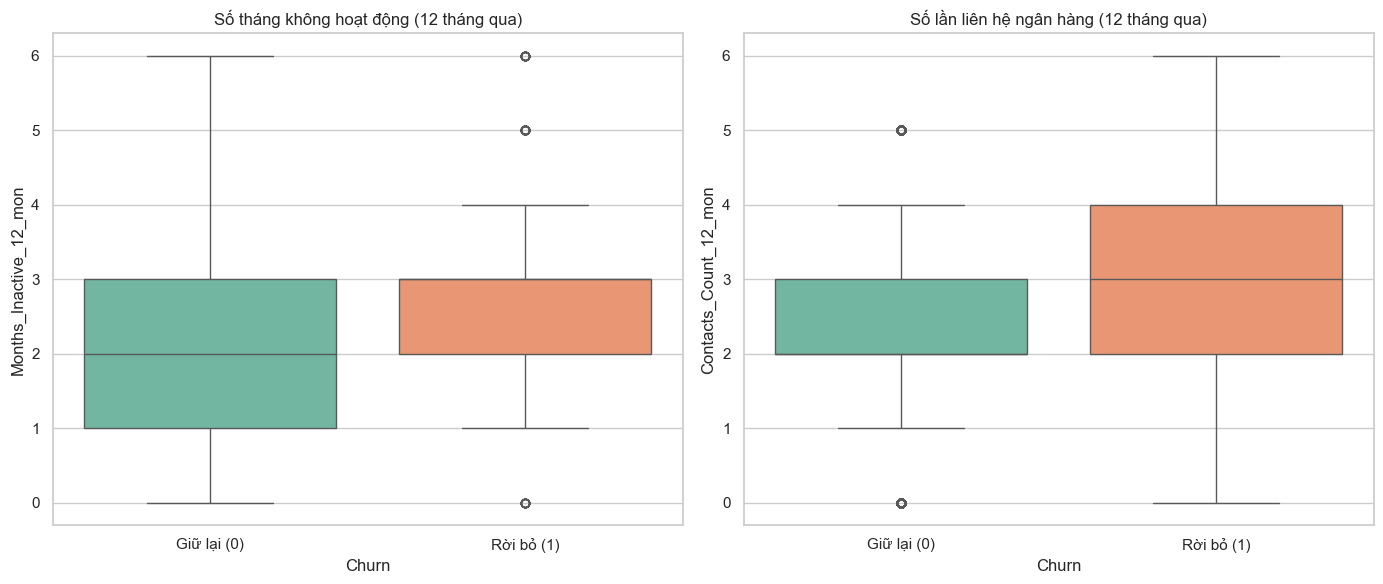

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Biểu đồ 1: Số tháng không hoạt động
sns.boxplot(data=df_eda, x='Churn', y='Months_Inactive_12_mon', palette='Set2', ax=axes[0])
axes[0].set_title('Số tháng không hoạt động (12 tháng qua)')
axes[0].set_xticklabels(['Giữ lại (0)', 'Rời bỏ (1)'])

# Biểu đồ 2: Số lần liên hệ
sns.boxplot(data=df_eda, x='Churn', y='Contacts_Count_12_mon', palette='Set2', ax=axes[1])
axes[1].set_title('Số lần liên hệ ngân hàng (12 tháng qua)')
axes[1].set_xticklabels(['Giữ lại (0)', 'Rời bỏ (1)'])

plt.tight_layout()
plt.show()

**Insights:**
- **Khách hàng rời bỏ** có mức độ **không hoạt động cao hơn**, nhưng sự khác biệt không quá mạnh. Điều này cho thấy `inactivity` là tín hiệu `churn` nhưng chỉ ở mức **"trung bình"**, không phải **yếu tố dẫn đầu**.

- **Khách hàng chuẩn bị rời bỏ** thường **liên hệ ngân hàng nhiều hơn** (`3–4 lần`). Điều này gợi ý rằng họ có thể đã gặp vấn đề, gọi điện phàn nàn hoặc yêu cầu hỗ trợ nhưng không được giải quyết thỏa đáng dẫn đến việc hủy thẻ.

- **Kết luận**: Cần rà soát lại chất lượng chăm sóc khách hàng đối với những người gọi điện **> 3 lần/năm.**

### **Câu hỏi 1: Nhóm thu nhập (Income Category) ảnh hưởng như thế nào đến tỷ lệ churn?**

Mục tiêu:
- Kiểm tra xem khách hàng thu nhập thấp hoặc không khai báo (`"Unknown"`) có tỷ lệ **rời bỏ ngân hàng** cao hơn hay không.
- Đây là thông tin quan trọng trong phân khúc khách hàng rủi ro.


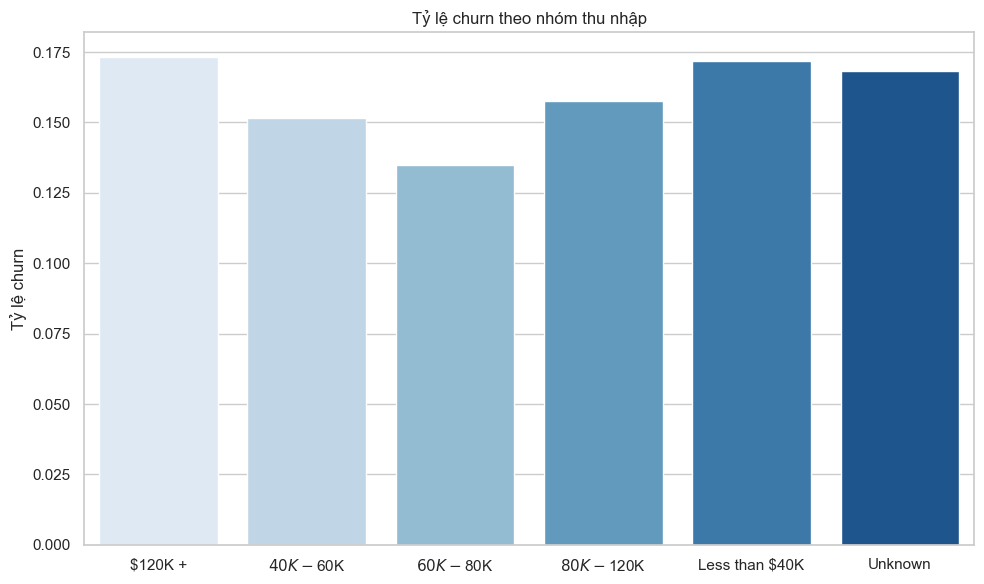

In [13]:
income_vals = np.unique(processed_data["Income_Category"])
income_churn_rates = []

is_churn = y_final.astype(int)
income = df_eda["Income_Category"]

for cat in income_vals:
    mask = (income == cat)
    churn_rate = is_churn[mask].mean()
    income_churn_rates.append(churn_rate)

plt.figure(figsize=(10,6))
sns.barplot(x=income_vals, y=income_churn_rates, palette='Blues')
plt.title("Tỷ lệ churn theo nhóm thu nhập")
plt.ylabel("Tỷ lệ churn")
plt.tight_layout()
plt.show()


**Insights:**
1. **Nhóm thu nhập cao nhất `$120K+` lại có churn cao nhất (~17.4%)**
   - Nhóm **$120K+ là ít người nhất** → sample size nhỏ → tỷ lệ **biến động cao.**
   - Những khách hàng **thu nhập cao** có nhiều lựa chọn **dịch vụ tài chính khác** → dễ rời bỏ khi **không hài lòng.**
2. **Nhóm churn cao tiếp theo `Less than $40k` và `Unknown`**
   - Thu nhập thấp → ít gắn kết, giao dịch nhỏ, dễ rời bỏ.
   - Unknown → không khai báo thông tin → ít trung thành, ít quan tâm dịch vụ.

### **Câu hỏi 3: Giá trị giao dịch trung bình (`Avg_Trans_Amount`) có liên quan đến churn?**

Xem xét mức độ **"chất lượng"** giao dịch: Khách hàng rời bỏ có xu hướng giao dịch nhỏ lẻ?

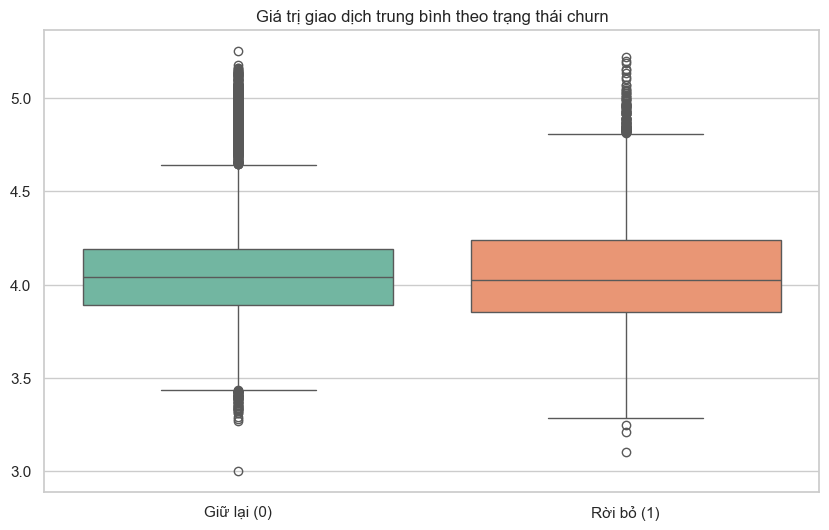

In [14]:
plt.figure(figsize=(10,6))
sns.boxplot(x=is_churn, y=df_eda['Avg_Trans_Amount'], palette='Set2')
plt.xticks([0,1], ['Giữ lại (0)', 'Rời bỏ (1)'])
plt.title("Giá trị giao dịch trung bình theo trạng thái churn")
plt.show()


**Insights:**
- Theo quan sát, thì trung vị của `Giữ lại`và `Rời bỏ` không có sự khác biệt và các điểm outliers cũng có sự tương tự với nhau
- **Kết luận:** Có thể biến `Avg_Trans_Amount` không ảnh hưởng quá nhiều đến churn

### **Câu hỏi 4: Sự thay đổi hành vi giao dịch Q4 → Q1 có dự đoán churn?**

**Giả thuyết:**
- Nếu khách hàng **giảm số lượng** hoặc **giá trị giao dịch** → đang chuẩn bị **rời bỏ.**

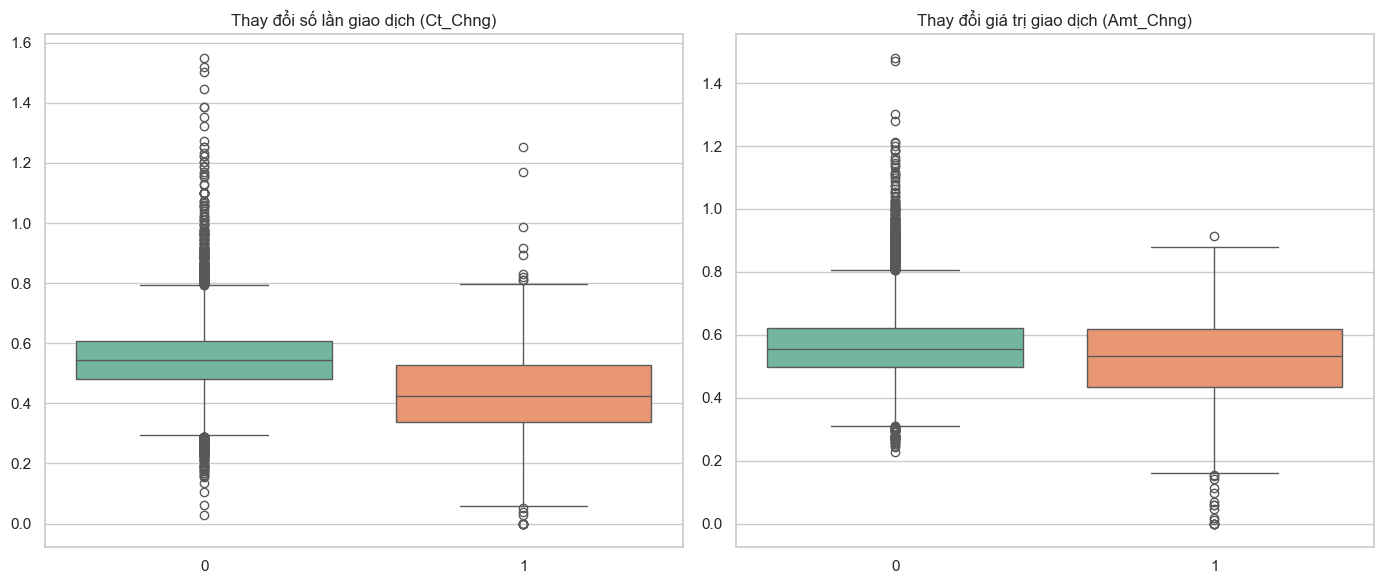

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(14,6))

sns.boxplot(x=y_final, y=df_eda['Total_Ct_Chng_Q4_Q1'], ax=axes[0], palette="Set2")
axes[0].set_title("Thay đổi số lần giao dịch (Ct_Chng)")

sns.boxplot(x=y_final, y=df_eda['Total_Amt_Chng_Q4_Q1'], ax=axes[1], palette="Set2")
axes[1].set_title("Thay đổi giá trị giao dịch (Amt_Chng)")

plt.tight_layout()
plt.show()

**insights:**  
- Khách hàng churn có xu hướng **giảm mạnh cả số lần giao dịch và giá trị giao dịch**.  
- Đây là `"tín hiệu cảnh báo sớm"` rất mạnh → ngân hàng có thể dùng để **phát hiện sớm** khách hàng sắp rời đi.


### **Câu hỏi 5: Loại thẻ nào churn nhiều nhất?**

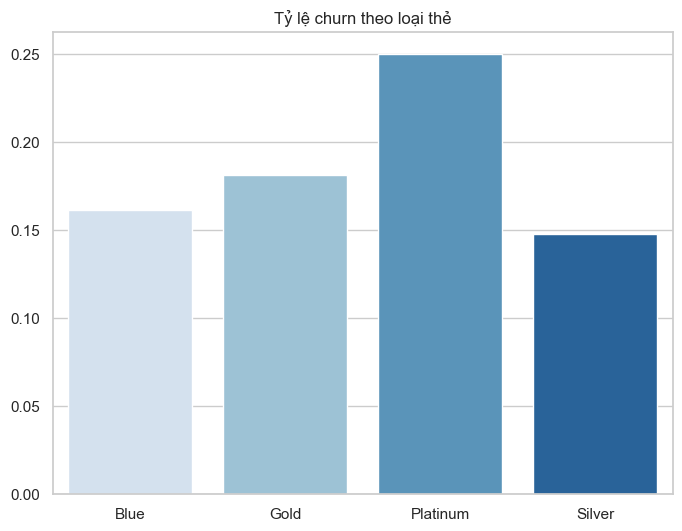

In [16]:
categories = np.unique(df_eda["Card_Category"])
rates = [ np.mean(y_final[df_eda["Card_Category"] == c]) for c in categories ]

fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(x=categories, y=rates, palette="Blues", ax=ax)
ax.set_title("Tỷ lệ churn theo loại thẻ")
plt.show()

**Insights:**

- `Platinum` là nhóm thẻ có tỷ lệ churn cao nhất `(~25%)`.

- Đây là nhóm khách hàng có **giá trị cao**, **kỳ vọng cao** và dễ rời bỏ nếu dịch vụ **không đáp ứng kỳ vọng.**

- `Platinum` chiếm tỷ trọng thấp nhưng đóng góp doanh thu lớn → **cần ưu tiên giữ chân.**

**Phương pháp:**

- Củng cố chương trình `loyalty` dành riêng cho `Platinum`

- Theo dõi hành vi giao dịch **để phát hiện sớm** các dấu hiệu **giảm hoạt động**

- Tăng cường **CSKH chuyên biệt**, **hotline ưu tiên**

- Xem lại **mức phí và ưu đãi** có còn cạnh tranh hay không.

### **Câu hỏi 6: KH càng có nhiều sản phẩm của ngân hàng → càng ít churn?**

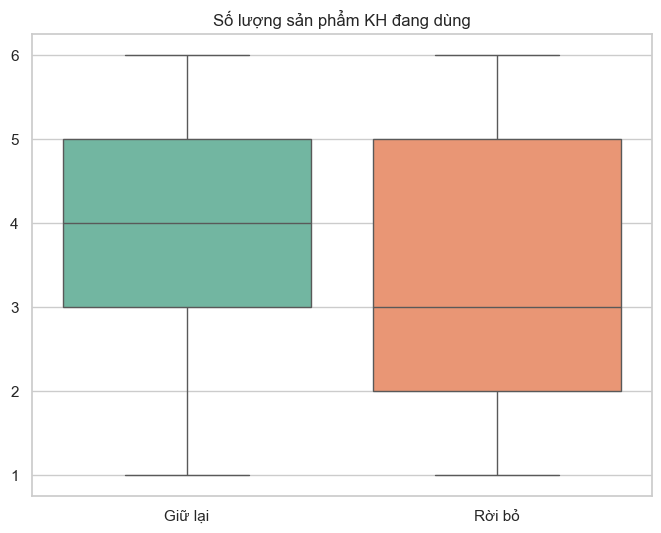

In [17]:
fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(x=y_final, y=df_eda['Total_Relationship_Count'], ax=ax, palette="Set2")
ax.set_xticklabels(["Giữ lại", "Rời bỏ"])
ax.set_title("Số lượng sản phẩm KH đang dùng")
plt.show()


**Insights:**

**Biểu đồ cho thấy khách hàng rời bỏ (churn) thường sử dụng ít sản phẩm hơn so với nhóm ở lại.**
- Nhóm `giữ lại` có median khoảng 4 sản phẩm
- Nhóm `churn` chỉ khoảng 3 sản phẩm
- Khách dùng càng ít sản phẩm → mức độ gắn kết thấp → dễ rời bỏ hơn.
-  Khách dùng nhiều sản phẩm → phụ thuộc hệ sinh thái ngân hàng → churn thấp.

**Kết luận:** Khách hàng dùng nhiều sản phẩm có khả năng churn thấp hơn.

### Câu hỏi 7: Mối quan hệ giữa "Tần suất giao dịch" và "Tổng tiền giao dịch" có tạo ra các cụm khách hàng rủi ro không?

**Giả thuyết:** Những khách hàng giao dịch ít và chi tiêu ít sẽ có nguy cơ rời bỏ cao hơn. Chúng ta sẽ dùng Scatter Plot để kiểm chứng xem có sự phân tách nhóm (separation) nào không.

*Lưu ý: Vì ở bước Feature Engineering ta đã xóa cột `Total_Trans_Ct` và `Total_Trans_Amt` để giảm đa cộng tuyến, nên giờ ta sẽ lấy lại dữ liệu gốc từ `clean_data_store` để vẽ biểu đồ này.*

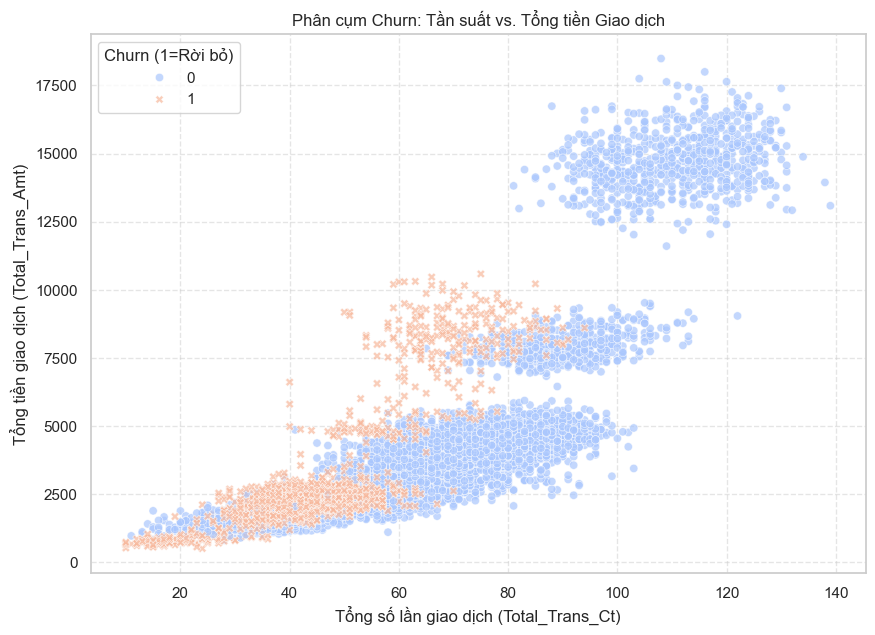

In [18]:
# Lấy dữ liệu gốc để vẽ (vì nó trực quan hơn biến Log transform)
x_data = clean_data_store['Total_Trans_Ct']
y_data = clean_data_store['Total_Trans_Amt']
labels = y_final # Biến mục tiêu (0/1)

plt.figure(figsize=(10, 7))
sns.scatterplot(
    x=x_data, 
    y=y_data, 
    hue=labels, 
    style=labels, # Thay đổi hình dạng điểm cho dễ nhìn (tròn/chéo)
    palette='coolwarm', 
    alpha=0.7
)

plt.title('Phân cụm Churn: Tần suất vs. Tổng tiền Giao dịch')
plt.xlabel('Tổng số lần giao dịch (Total_Trans_Ct)')
plt.ylabel('Tổng tiền giao dịch (Total_Trans_Amt)')
plt.legend(title='Churn (1=Rời bỏ)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

### **Câu hỏi 8: Feature nào tương quan mạnh nhất với churn?**
- Xác định feature quan trọng nhất để giữ lại cho mô hình.

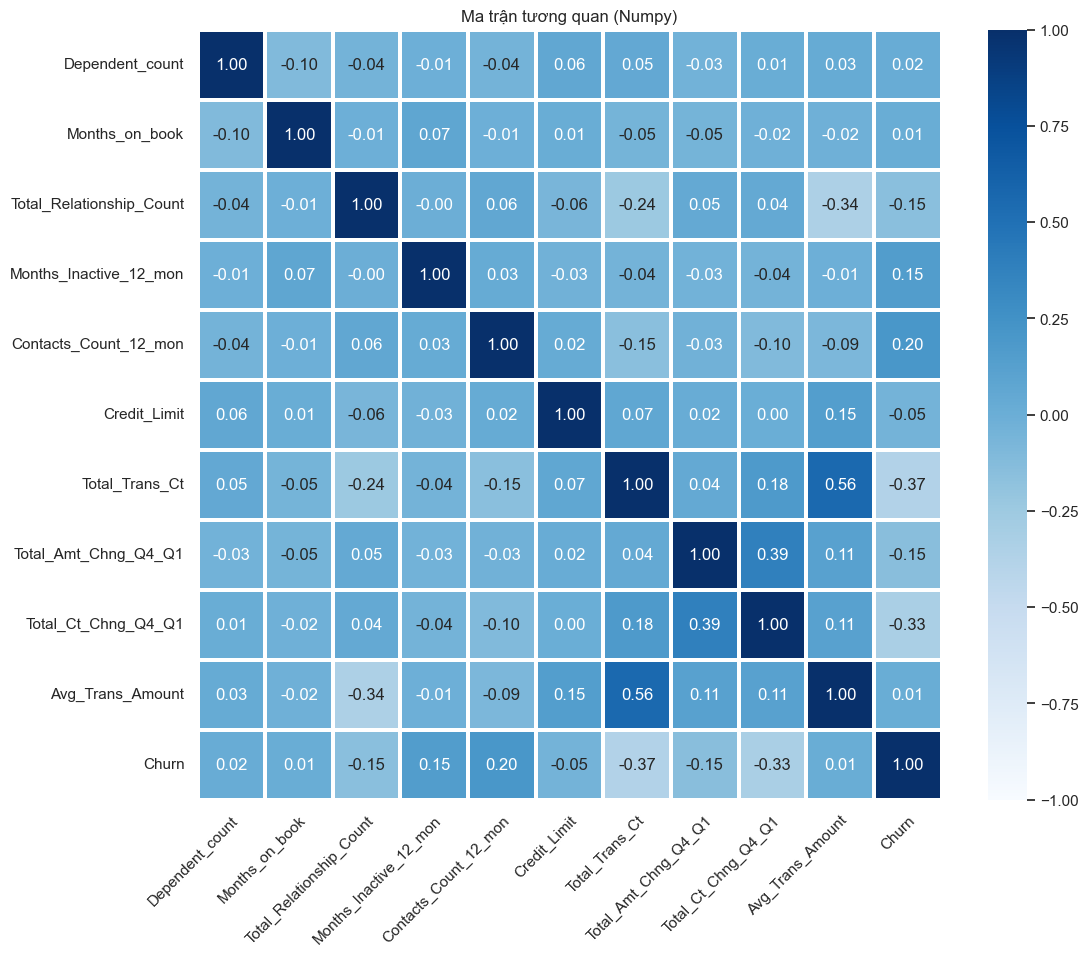

In [19]:
# Để vẽ correlation, ta cần gom hết cột số và target vào 1 matrix
# Tạo matrix 2D từ dictionary
keys = numerical_cols + ['Churn']
# Lấy data số từ dictionary, thêm cột target vào cuối
matrix_list = [df_eda[k] for k in numerical_cols]
matrix_list.append(y_final)
data_matrix = np.column_stack(matrix_list)

# Tính ma trận tương quan bằng numpy
corr_matrix = np.corrcoef(data_matrix, rowvar=False)

fig, ax = plt.subplots(figsize=(12, 10))
vi.plot_correlation_heatmap(
    corr_matrix, ax, 
    title='Ma trận tương quan (Numpy)', 
    x_labels=keys, y_labels=keys
)
plt.show()

**Nhận xét:**

Dựa trên **|corr| < 0.05** (gần như không liên quan):
- `Dependent_count` → corr ≈ **0.02**
- `Months_on_book` → corr ≈ **0.01**
- `Credit_Limit` → corr ≈ **-0.05**
- `Avg_Trans_Amount` → **corr ≈ 0.01**

### Feature Selection

In [20]:
threshold = 0.05

cols_to_drop_corr = []

for col in processed_data:
    col_arr = processed_data[col]
    if col_arr.dtype not in [np.float64, np.int64, float, int]:
        continue
    corr = np.corrcoef(col_arr, y_final)[0, 1]
    if abs(corr) < threshold:
        cols_to_drop_corr.append(col)
        print(f"Loại: {col} (corr = {corr:.3f})")
    else:
        print(f"Giữ:  {col} (corr = {corr:.3f})")

# Loại các cột
for col in cols_to_drop_corr:
    del processed_data[col]

print("\nCác cột đã bị loại:", cols_to_drop_corr)

Loại: Dependent_count (corr = 0.019)
Loại: Months_on_book (corr = 0.014)
Giữ:  Total_Relationship_Count (corr = -0.150)
Giữ:  Months_Inactive_12_mon (corr = 0.152)
Giữ:  Contacts_Count_12_mon (corr = 0.204)
Loại: Credit_Limit (corr = -0.024)
Giữ:  Total_Trans_Ct (corr = -0.371)
Giữ:  Total_Amt_Chng_Q4_Q1 (corr = -0.131)
Giữ:  Total_Ct_Chng_Q4_Q1 (corr = -0.290)
Loại: Avg_Trans_Amount (corr = 0.016)
Giữ:  Has_Revolving_Bal (corr = -0.311)

Các cột đã bị loại: ['Dependent_count', 'Months_on_book', 'Credit_Limit', 'Avg_Trans_Amount']


## 6. Mã hóa dữ liệu (Encoding Categorical Variables)
Chúng ta sẽ chuyển đổi các biến phân loại thành dạng số `(One-Hot Encoding)` để máy tính có thể hiểu được.

In [21]:
current_cat_cols = [
    col for col in processed_data.keys() 
    if isinstance(processed_data[col][0], (str, np.str_)) 
]
numerical_cols_new = [
    key for key , value in data_for_analysis.items() 
    if value.dtype in ['float64', 'int64', 'int32']
]
print("Các cột cần One-Hot Encoding:", current_cat_cols)

# Dictionary chứa dữ liệu cuối cùng
final_data_dict = {}

# A. Đưa các cột số vào trước
for col in numerical_cols_new:
    final_data_dict[col] = data_for_analysis[col]

# B. Thực hiện One-Hot Encoding cho các cột Category
encoded_col_names = []

for col in current_cat_cols:
    ohe_matrix, categories = dp.one_hot_encoding(processed_data[col])
    
    for i, cat_name in enumerate(categories):
        # Tạo tên cột mới: VD: Gender_M, Gender_F
        new_col_name = f"{col}_{cat_name}"
        final_data_dict[new_col_name] = ohe_matrix[:, i]
        encoded_col_names.append(new_col_name)

print(f"Đã mã hóa xong. Tạo thêm {len(encoded_col_names)} cột số.")

Các cột cần One-Hot Encoding: ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
Đã mã hóa xong. Tạo thêm 21 cột số.


## 7. Tạo mảng X (Features) và y (Target) cho Modeling

In [22]:
# 1. Gom tất cả feature vào danh sách
feature_list = []
feature_names = []

# Duyệt qua dictionary để đảm bảo thứ tự
for name, arr in final_data_dict.items():
    feature_list.append(arr)
    feature_names.append(name)

# 2. Stack thành ma trận 2D (Số dòng x Số cột)
X_full = np.column_stack(feature_list)

# 3. Lấy biến Target (đã encode ở bước đầu)
y_full = y_final

print("--- KẾT QUẢ TIỀN XỬ LÝ ---")
print(f"Shape X (Features): {X_full.shape}")
print(f"Shape y (Target):   {y_full.shape}")
print("Danh sách Features:", feature_names)

--- KẾT QUẢ TIỀN XỬ LÝ ---
Shape X (Features): (10127, 32)
Shape y (Target):   (10127,)
Danh sách Features: ['Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Trans_Ct', 'Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1', 'Avg_Trans_Amount', 'Has_Revolving_Bal', 'Gender_F', 'Gender_M', 'Education_Level_College', 'Education_Level_Doctorate', 'Education_Level_Graduate', 'Education_Level_High School', 'Education_Level_Post-Graduate', 'Education_Level_Uneducated', 'Marital_Status_Divorced', 'Marital_Status_Married', 'Marital_Status_Single', 'Income_Category_$120K +', 'Income_Category_$40K - $60K', 'Income_Category_$60K - $80K', 'Income_Category_$80K - $120K', 'Income_Category_Less than $40K', 'Income_Category_Unknown', 'Card_Category_Blue', 'Card_Category_Gold', 'Card_Category_Platinum', 'Card_Category_Silver']


In [23]:
output_dir = '../data/processed'
os.makedirs(output_dir, exist_ok=True)

# 1. Lưu các file .npy (để dùng cho việc load nhanh vào mô hình sau này)
np.save(os.path.join(output_dir, 'X_full.npy'), X_full)
np.save(os.path.join(output_dir, 'y_full.npy'), y_full)

# 2. Lưu danh sách tên cột vào file text riêng
with open(os.path.join(output_dir, 'feature_names.txt'), 'w', encoding='utf-8') as f:
    for name in feature_names:
        f.write(f"{name}\n")

# 3. Lưu file CSV tổng hợp (X + y) bằng NumPy
# Bước 3a: Ghép X và y lại thành 1 bảng lớn
# y_full đang là mảng 1 chiều, cần reshape thành cột (n, 1) để ghép
y_reshaped = y_full.reshape(-1, 1)
final_dataset = np.column_stack((X_full, y_reshaped))

# Bước 3b: Tạo header (dòng tiêu đề)
# Thêm cột 'Churn' vào cuối danh sách feature
full_header = feature_names + ['Churn']
header_str = ",".join(full_header)

# Bước 3c: Lưu bằng np.savetxt
csv_path = os.path.join(output_dir, 'data_clean_encoded.csv')

# fmt='%.6f' để lưu số thập phân, comments='' để bỏ dấu # mặc định của numpy ở header
np.savetxt(
    csv_path, 
    final_dataset, 
    delimiter=",", 
    header=header_str, 
    comments='', 
    fmt='%.6f'
)

print(f"Đã lưu xong dữ liệu vào: {output_dir}")
print(f"- X_full.npy: {X_full.shape}")
print(f"- y_full.npy: {y_full.shape}")
print(f"- data_clean_encoded.csv (đã bao gồm header)")

Đã lưu xong dữ liệu vào: ../data/processed
- X_full.npy: (10127, 32)
- y_full.npy: (10127,)
- data_clean_encoded.csv (đã bao gồm header)
